id를 기준으로 
이 데이터 eda를 해봐라

어떤 칼럼과 관계가 있는지 

관계에 대한 처리를 그래프

성별, 나이, 수익, 소비점수에 영향을 줄 수 있는 ?

가설을 세우기

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font', family='Malgun Gothic') # 한국어


In [ ]:
# 같은 디렉토리에 있는 mall...csv파일 읽어와서 data에 넣어줌
# low_memory=False => 메모리를 좀 더 사용하는 대신 전체 데이터를 다보고 정확히 데이터 타입을 정해줌.
data = pd.read_csv('Mall_Customers.csv',encoding='cp949',low_memory = False)

# csv에 있는 칼럼 중 사용할 칼럼 지정. 일단 전부 사용하기 위해 주석
#data_1 = data[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

# 확인
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


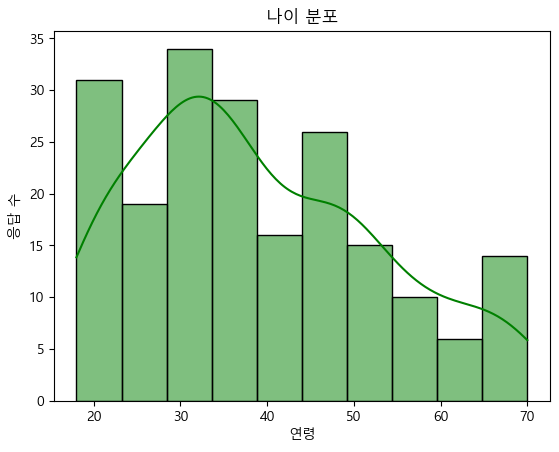

In [111]:

sns.histplot(data['Age'], bins=10, kde=True, color='green',edgecolor='black')
# kde=True는 밀도곡선 추가
# bins=10 10살씩 구분
plt.title("나이 분포")
plt.xlabel("연령")
plt.ylabel("응답 수")
plt.show()

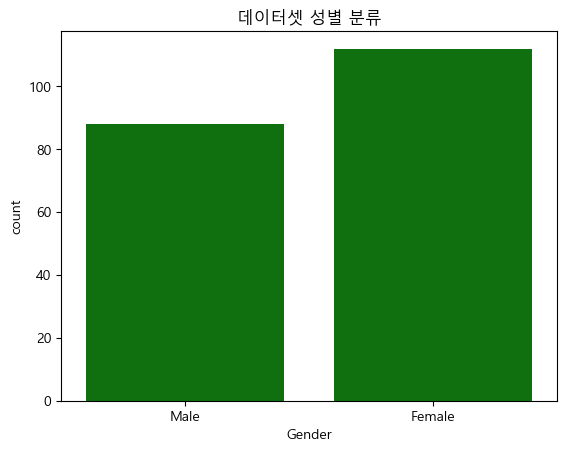

In [101]:
sns.countplot(x='Gender',color="green", data=data)
plt.title('데이터셋 성별 분류')
plt.show()


데이터셋에 존재하는 200명의 데이터 중 여자가 조금 더 많다.

C:\Users\User\AppData\Local\Temp\ipykernel_8856\842582587.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inc_by_age = data.groupby('AgeGroup')['Annual Income (k$)'].mean()


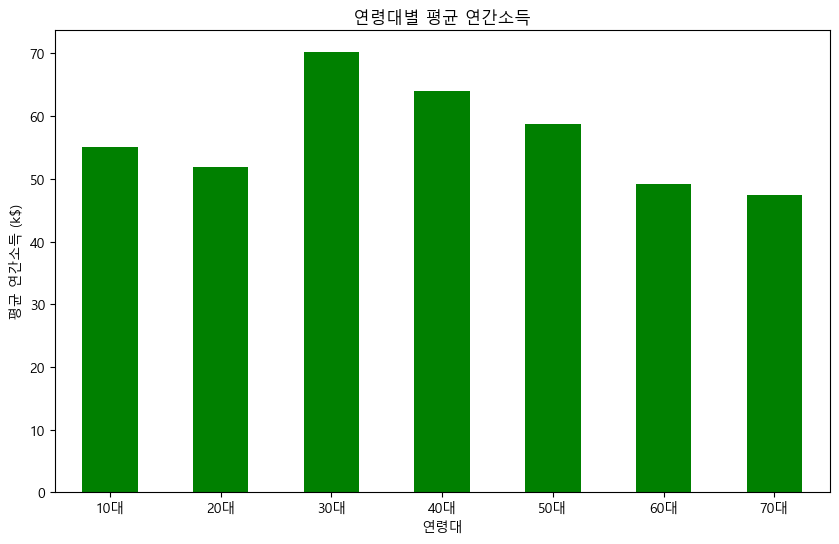

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 연령대 구간 설정
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대']

#  연령대 컬럼 추가 (data를 기준으로 작업하면 됨)
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# 연령대별 평균 연소득 계산
inc_by_age = data.groupby('AgeGroup')['Annual Income (k$)'].mean()

# 연령과 연간 평균소득의 시각화
plt.figure(figsize=(10,6))
inc_by_age.plot(kind='bar', color='green')  # x: 연령대, y: 평균소득
plt.title('연령대별 평균 연간소득')
plt.xlabel('연령대')
plt.ylabel('평균 연간소득 (k$)')
plt.xticks(rotation=0)
plt.show()


10대가 연간소득이 많다..?

일단 30대가 평균 연간소득이 가장 많은것으로 나왔다

C:\Users\User\AppData\Local\Temp\ipykernel_8856\1925469397.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spe_by_age = data.groupby('AgeGroup')['Spending Score (1-100)'].mean()


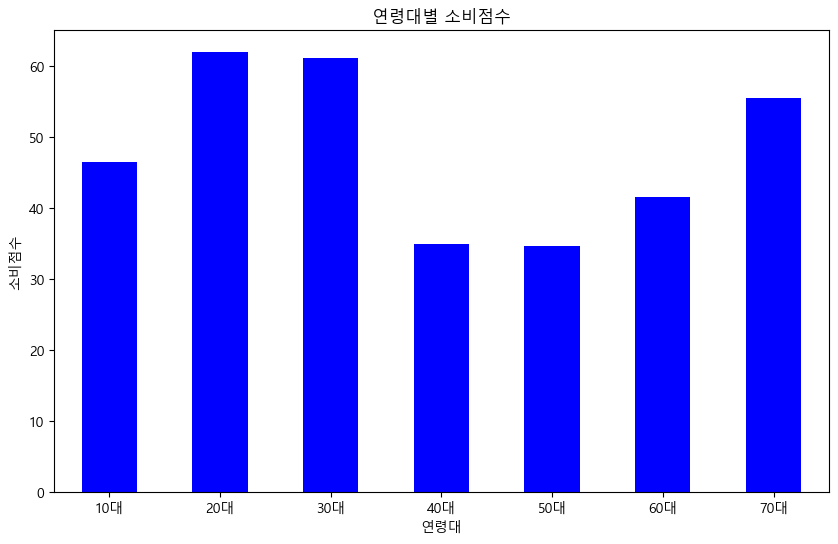

In [ ]:

# 연령대별 소비점수
spe_by_age = data.groupby('AgeGroup')['Spending Score (1-100)'].mean()

# 연령과 소비점수의 시각화
plt.figure(figsize=(10,6))
spe_by_age.plot(kind='bar', color='blue')  # x: 연령대, y: 평균소득
plt.title('연령대별 소비점수')
plt.xlabel('연령대')
plt.ylabel('소비점수')
plt.xticks(rotation=0)
plt.show()


10대 4등 20대가 1등 30대가 2등으로 젊은층이 소비점수가 높다.

40,50,60대의 소비점수가 매우 낮다

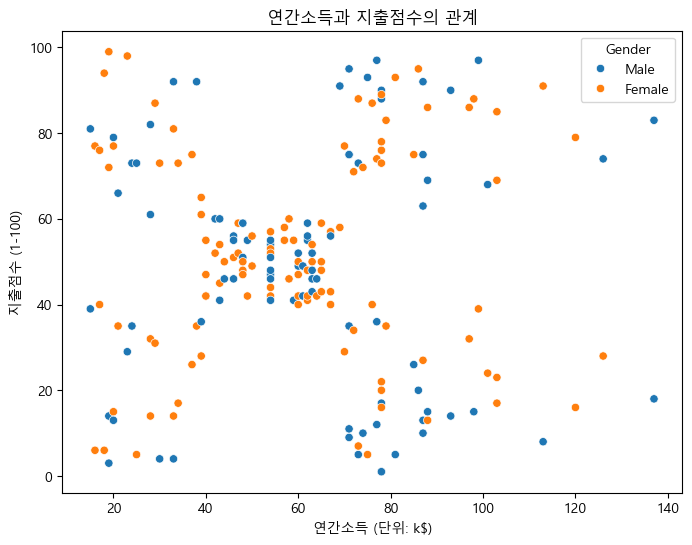

In [130]:
# 산점도 생성 연간소득과 지출의 관계가 궁금하므로 
plt.figure(figsize=(8,6)) # 그래프 사이즈(가로,세로)
# hue = 어떤 기준으로 색을 나눌지, x,y축에 쓰일 칼럼, 사용할 데이터
sns.scatterplot(hue='Gender',x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title("연간소득과 지출점수의 관계")
plt.xlabel("연간소득 (단위: k$)")
plt.ylabel("지출점수 (1-100)")
plt.show()

딱히 소득이 많다고 지출이 많지 않고, 소득이 적다고 지출이 적지 않다. 

둘이 관계가 없다고 판단


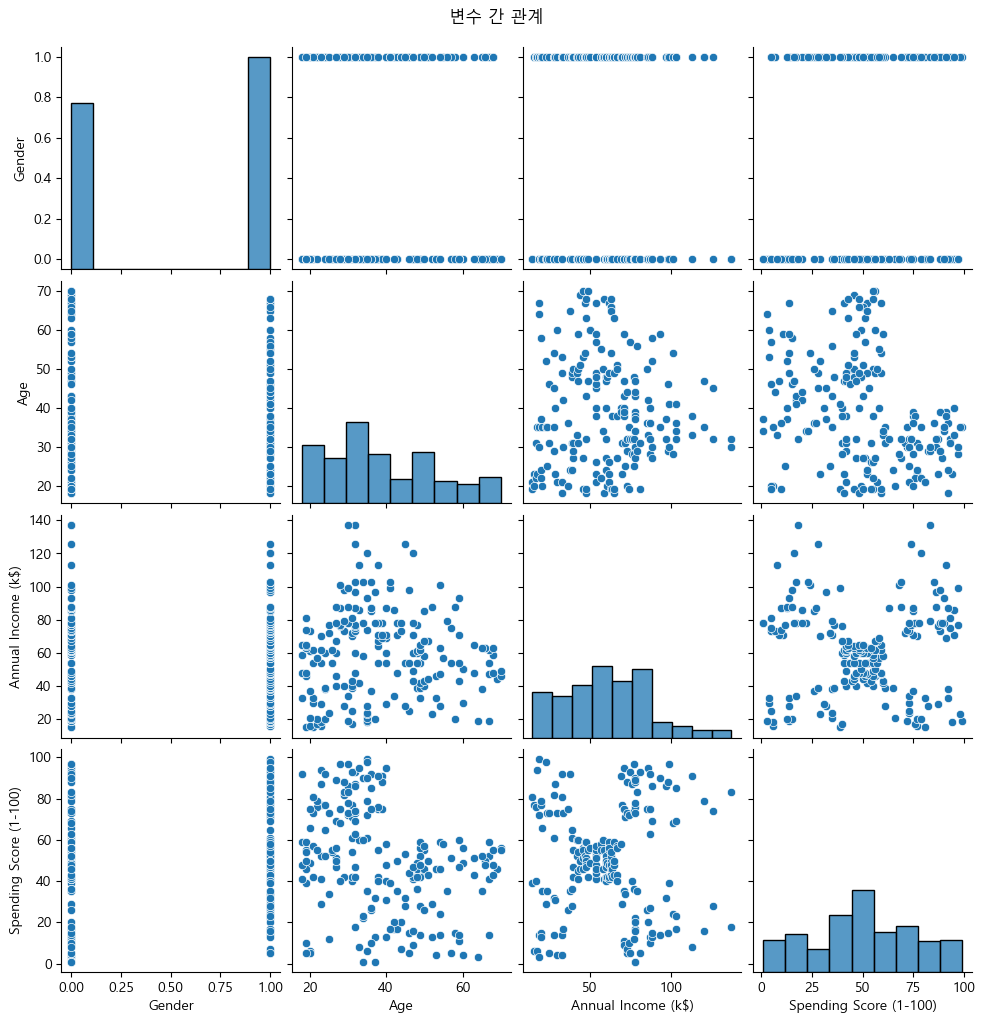

In [131]:
# 숫자만 계산하기 때문에 male과 femal을 숫자로 변경했다.
# CustomerID도 필요없을것 같아 제거.
data_1['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data_2 = data_1[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]

sns.pairplot(data_2)
plt.suptitle(" 변수 간 관계", y=1.02)
plt.show()

성별도 관계 없다고 판단.

c:\project\py_project\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


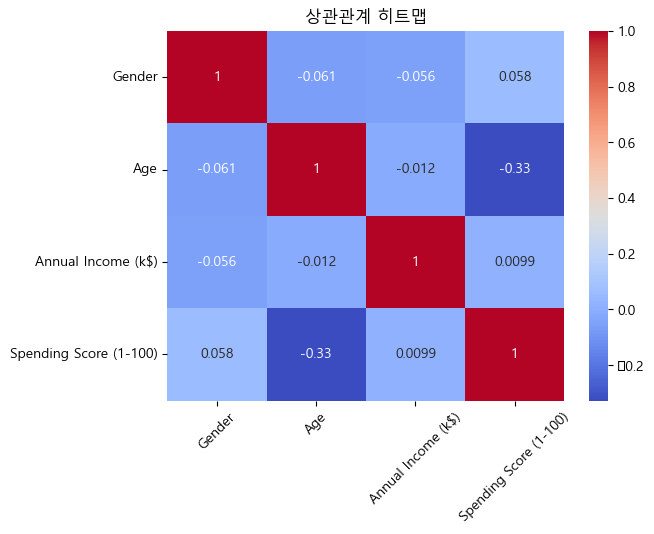

In [114]:


# 상관계수 계산
correlation = data_1.corr()
# 히트맵 생성 cmap = coolwarm
# 파란색이 음의 상관관계 (반비례)
# 빨간색이 양의 상관관계 (정비례)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("상관관계 히트맵")
plt.xticks(rotation = 45)
plt.show()

나머진 전부 관계가 없고
그나마 나이와 소비점수와 -0.33으로 상관 관계를 가진다.
나이가 많고 소비점수이 낮으면 음수로 나온다고 한다.

따라서 
나이가 많아지면서 소비를 줄인다 => 젊은 사람들의 소비가 상대적으로 많다.
소득이 많다고 

판매 타겟층을 젊은사람으로? 

광고로 젊은층을 노린다